## Two sample t-test

https://www.andrew.cmu.edu/user/achoulde/94842/lectures/lecture07/lecture07-94842.html  

http://www.sthda.com/english/wiki/unpaired-two-samples-t-test-in-r

In [1]:
library(ggplot2)
library(plyr)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
auto_mobiles <- read.csv("datasets/auto_mobiles_processed.csv", header = TRUE)

head(auto_mobiles, 5)

normalized_losses,fuel_type,aspiration,number_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
168,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
164,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
164,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
table(auto_mobiles$fuel_type)


diesel    gas 
    19    168 

In [4]:
options(repr.plot.width = 6, repr.plot.height = 5)

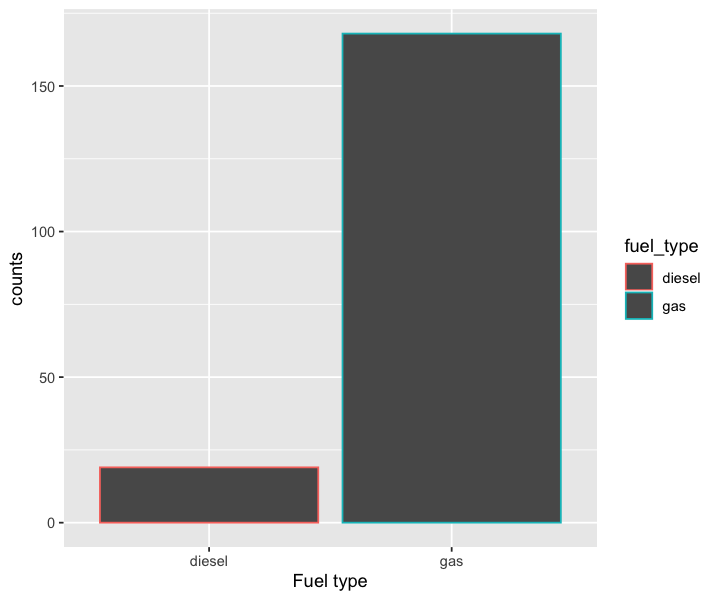

In [5]:
ggplot(data = auto_mobiles, 
       aes(factor(x = auto_mobiles$fuel_type), col = fuel_type)) + 
       geom_bar() +
       xlab('Fuel type') +
       ylab('counts')

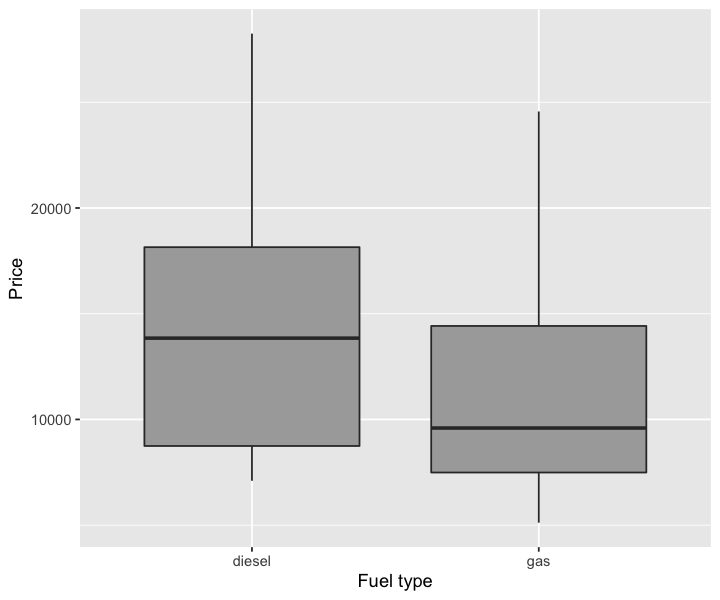

In [7]:
qplot(factor(x = fuel_type), y = price,
      geom = 'boxplot', data = auto_mobiles,
      xlab = 'Fuel type',
      ylab = 'Price',
      fill = I('#a9a9a9'))

##### Grouping the data by fuel type and then calculating the mean, std of price, std_error and group_size

In [8]:
model_data <- ddply(auto_mobiles, 
                    ~factor(fuel_type), 
                    summarize,
                    group_size = length(price),
                    price_mean = mean(price),
                    price_std = sd(price),
                    std_error_price = price_std / sqrt(group_size))

model_data

factor(fuel_type),group_size,price_mean,price_std,std_error_price
diesel,19,15008.58,7002.289,1606.4352
gas,168,11106.73,4557.894,351.6492


### Wilcoxon rank-sum test

https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/wilcox.test

https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

In [9]:
wilcox.test <- wilcox.test(auto_mobiles$price ~ auto_mobiles$fuel_type, 
                           data=auto_mobiles, 
                           conf.int=TRUE)
wilcox.test


	Wilcoxon rank sum test with continuity correction

data:  auto_mobiles$price by auto_mobiles$fuel_type
W = 2146, p-value = 0.014
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
  503 6236
sample estimates:
difference in location 
              2807.712 


In [10]:
with(auto_mobiles, wilcox.test(x=price[fuel_type=="diesel"], 
                               y=price[fuel_type=="gas"]))


	Wilcoxon rank sum test with continuity correction

data:  price[fuel_type == "diesel"] and price[fuel_type == "gas"]
W = 2146, p-value = 0.014
alternative hypothesis: true location shift is not equal to 0


#### Q-Q plot for price

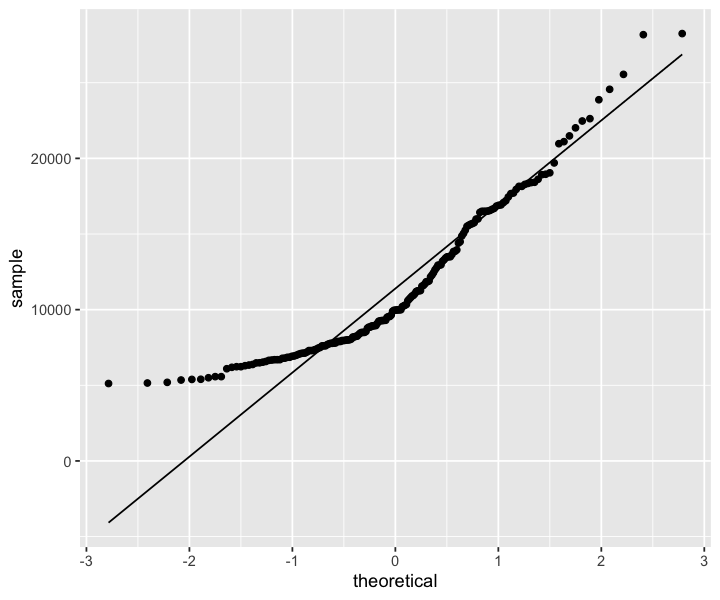

In [11]:
plot <- ggplot(data = auto_mobiles, aes(sample = auto_mobiles$price))

plot + stat_qq() + stat_qq_line()

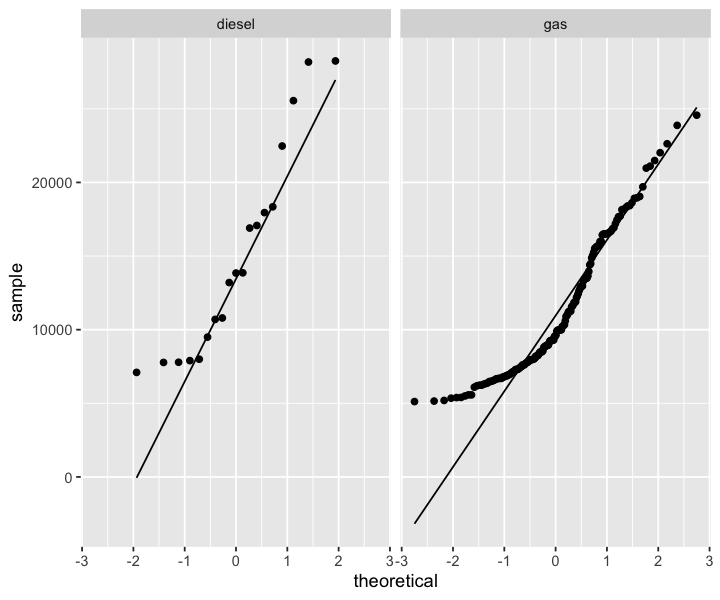

In [12]:
plot + stat_qq() + stat_qq_line() + facet_grid(. ~ fuel_type)

### Levene Test

* Note: For levene test we have to install the car package that we will install from terminal and for that we can use below command

conda install -c r r-car

In [15]:
# TODO while recording please show the command to install this package

library(car)

##### p-value is less than 0.05

In [16]:
leveneTest(price ~ fuel_type, data = auto_mobiles)

,Df,F value,Pr(>F)
group,1,6.037873,0.01492378
,185,NA,NA


In [17]:
t_tests <- t.test(price ~ factor(fuel_type), data = auto_mobiles, alternative = "two.sided")

t_tests


	Welch Two Sample t-test

data:  price by factor(fuel_type)
t = 2.3727, df = 19.761, p-value = 0.02793
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  468.880 7334.814
sample estimates:
mean in group diesel    mean in group gas 
            15008.58             11106.73 


In [18]:
names(t_tests)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [19]:
t_tests$method

[1] "Welch Two Sample t-test"

In [20]:
t_tests$data.name

[1] "price by factor(fuel_type)"

In [21]:
t_tests$statistic

t 
2.372704

In [22]:
t_tests$p.value

[1] 0.02792851

In [23]:
t_tests$conf.int

[1]  468.880 7334.814
attr(,"conf.level")
[1] 0.95

In [24]:
t_tests$estimate

mean in group diesel    mean in group gas 
            15008.58             11106.73